In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Prepare Data

In [2]:
points = []
with open('data') as file:
    for line in file:
        pos = line.replace('\n', '').split(' ')
        x, y = float(pos[0]), float(pos[1])
        points.append((x,y))

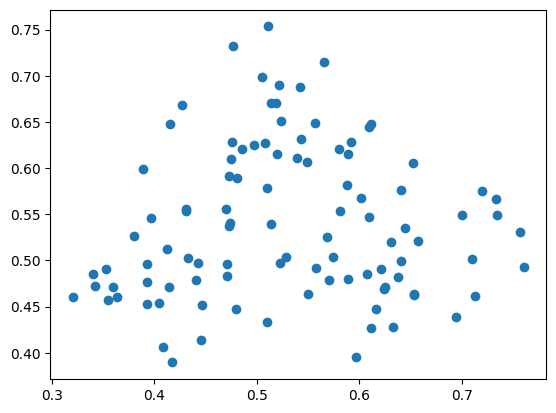

In [3]:
plt.scatter([p[0] for p in points], [p[1] for p in points])
plt.show()

# Question 1

a) Implement Lloyds Algorithm

In [4]:
def distance(p, q):
    return (p[0] - q[0])**2 + (p[1] - q[1])**2

def lloyd(K: int):
    N = len(points)

    # initialize cluster centers
    centers = [ points[randint(0, N - 1)] for k in range(K) ]

    # repeat until convergence
    while True:
        # assign every point to nearest cluster
        S = [[] for k in range(K)]
        for point in points:
            nearest_K = np.argmin([ distance(point,centers[k]) for k in range(K) ])
            S[nearest_K].append(point)
        
        # get mean for each cluster
        prev_u = centers.copy()
        for k in range(K):
            k_size = len(S[k])
            k_sum_x = sum([ point[0] for point in S[k] ])
            k_sum_y = sum([ point[1] for point in S[k] ])
            centers[k] = [ k_sum_x/k_size, k_sum_y/k_size ]
        
        # check convergence
        distances = [ distance(centers[k], prev_u[k]) for k in range(K) ]
        if max(distances) == 0:
            return S

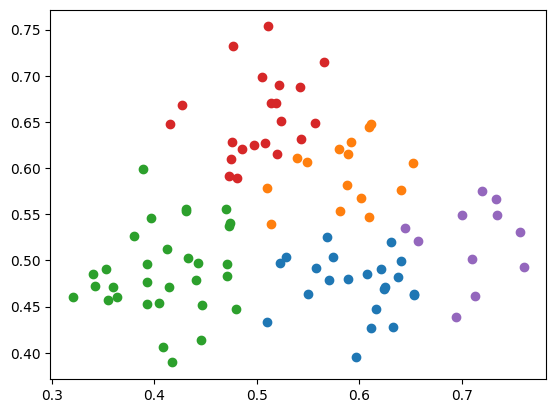

In [5]:
S = lloyd(5)

for k in range(len(S)):
    plt.scatter([ point[0] for point in S[k] ], [ point[1] for point in S[k] ])
plt.show()